<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


In this lab, I will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 159.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 63.1 MB/s eta 0:00:00:00:01


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 134.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 137.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 156.8 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-10-15 16:40:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  61.6MB/s    in 2.5s    

2025-10-15 16:40:41 (61.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [7]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


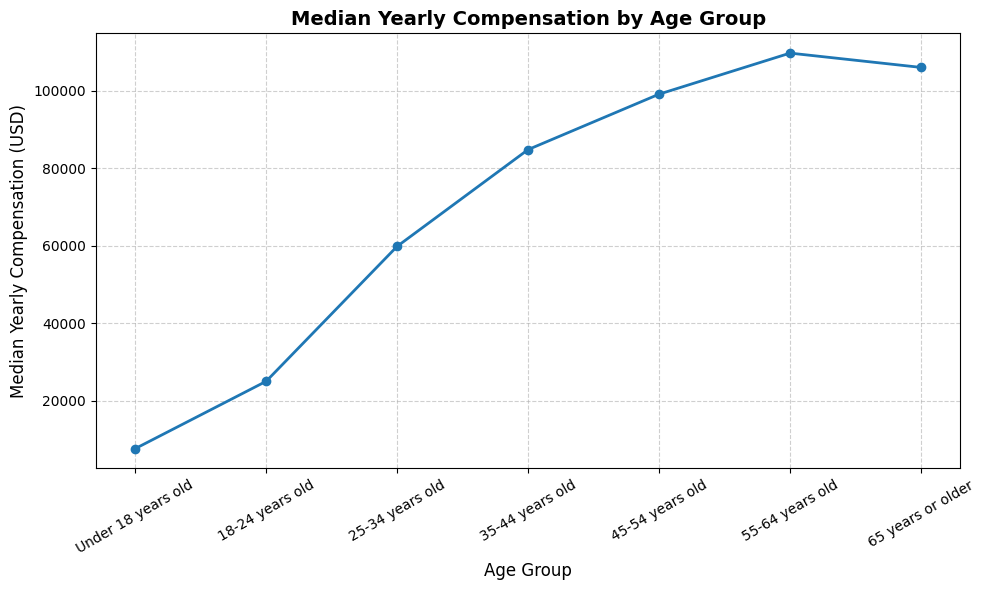

In [10]:
# --- Compute median compensation by Age category ---
median_comp_by_age = (
    df.groupby('Age', as_index=False)['ConvertedCompYearly']
    .median()
    .rename(columns={'ConvertedCompYearly': 'MedianCompensation'})
)

# --- Clean and prepare ---
# Remove rows where Age is missing or not meaningful
median_comp_by_age = median_comp_by_age.dropna(subset=['Age', 'MedianCompensation'])

# Convert everything in Age to string
median_comp_by_age['Age'] = median_comp_by_age['Age'].astype(str)

# --- Define age order manually ---
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Keep only recognized categories in our defined order
median_comp_by_age = median_comp_by_age[
    median_comp_by_age['Age'].isin(age_order)
]

# Reorder the DataFrame according to the list
median_comp_by_age['Age'] = pd.Categorical(
    median_comp_by_age['Age'],
    categories=age_order,
    ordered=True
)

median_comp_by_age = median_comp_by_age.sort_values('Age')

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    median_comp_by_age['Age'].astype(str),
    median_comp_by_age['MedianCompensation'],
    marker='o',
    linestyle='-',
    color='#1f77b4',
    linewidth=2
)

# --- Labels & Style ---
ax.set_title("Median Yearly Compensation by Age Group", fontsize=14, weight='bold')
ax.set_xlabel("Age Group", fontsize=12)
ax.set_ylabel("Median Yearly Compensation (USD)", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='x', rotation=30)
plt.tight_layout()

plt.show()


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


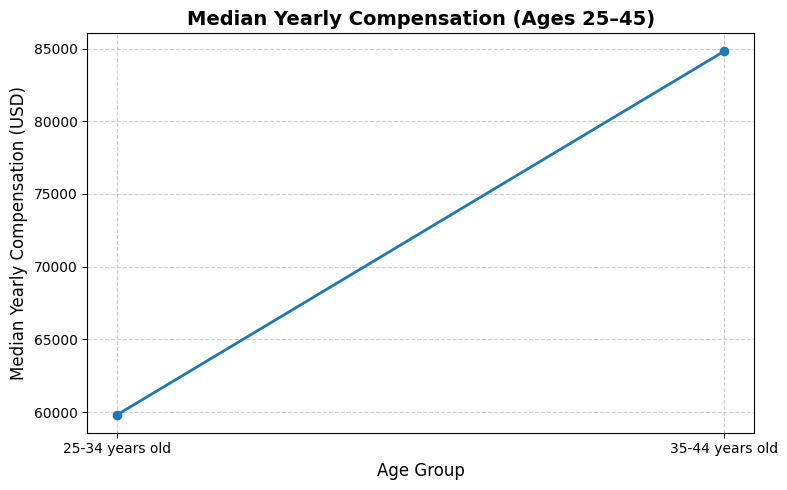

In [11]:
# Filter for ages 25-34 and 35-44
age_filter = ['25-34 years old', '35-44 years old']
df_filtered = df[df['Age'].isin(age_filter)]

# Calculate median compensation by age group
median_comp = (
    df_filtered.groupby('Age', as_index=False)['ConvertedCompYearly']
    .median()
    .rename(columns={'ConvertedCompYearly': 'MedianCompensation'})
)

# Keep correct age order
age_order = ['25-34 years old', '35-44 years old']
median_comp['Age'] = pd.Categorical(median_comp['Age'], categories=age_order, ordered=True)
median_comp = median_comp.sort_values('Age')

# Plot line chart
plt.figure(figsize=(8,5))
plt.plot(
    median_comp['Age'],
    median_comp['MedianCompensation'],
    marker='o',
    linestyle='-',
    color='#1f77b4',
    linewidth=2
)

# Labels and title
plt.title("Median Yearly Compensation (Ages 25–45)", fontsize=14, weight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Median Yearly Compensation (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


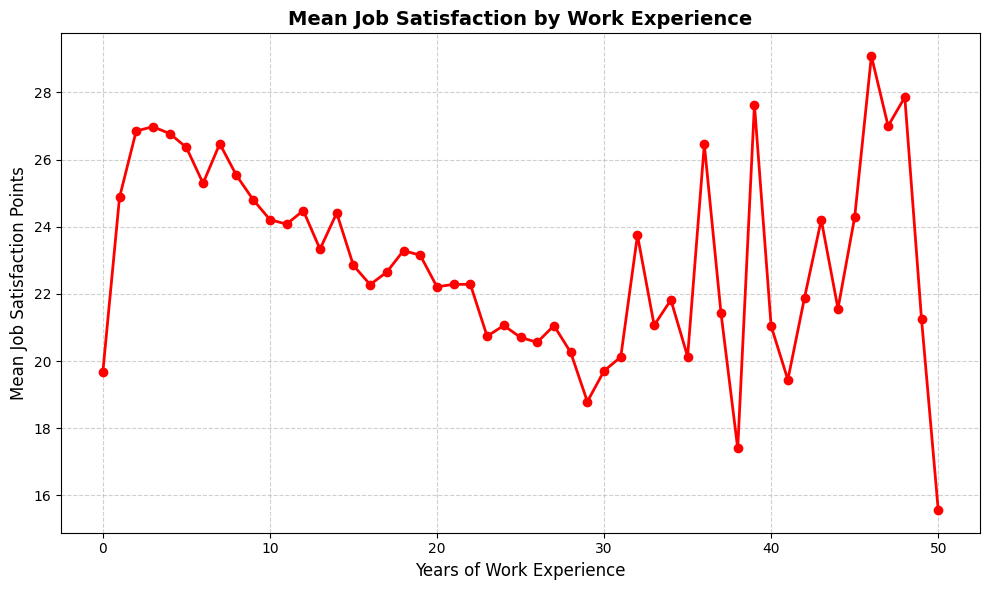

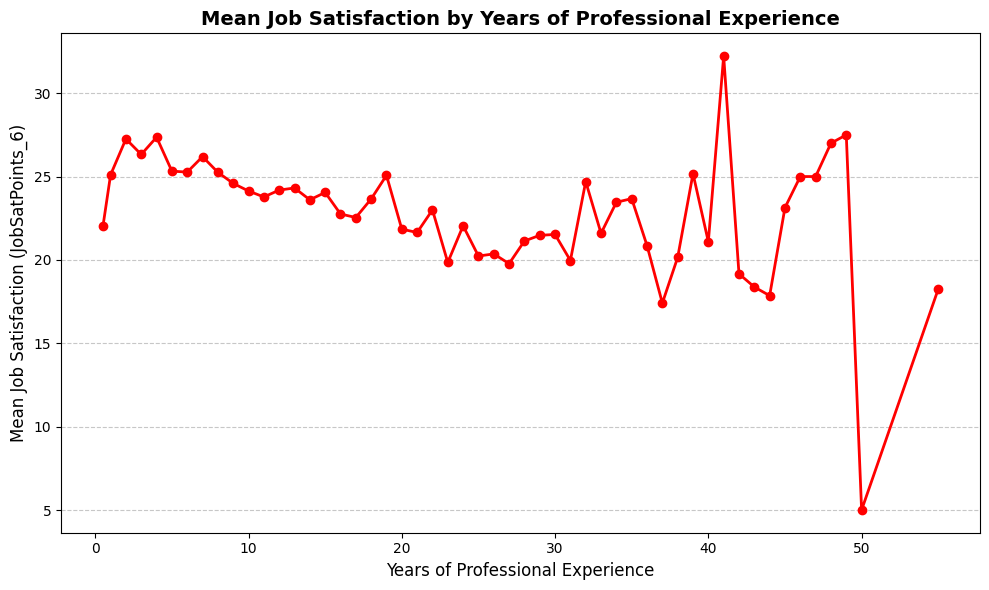

In [24]:
# We will use the WorkExp column to analyze how job satisfaction changes with experience.
# Remove missing WorkExp values
df_exp = df.dropna(subset=['WorkExp'])

# Calculate mean job satisfaction by experience
mean_jobsat = df_exp.groupby('WorkExp', as_index=False)['JobSatPoints_6'].mean()
mean_jobsat = mean_jobsat.rename(columns={'JobSatPoints_6': 'MeanJobSat'})

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(
    mean_jobsat['WorkExp'],
    mean_jobsat['MeanJobSat'],
    marker='o',
    linestyle='-',
    color='red',
    linewidth=2
)

# Labels and grid
plt.title("Mean Job Satisfaction by Work Experience", fontsize=14, weight='bold')
plt.xlabel("Years of Work Experience", fontsize=12)
plt.ylabel("Mean Job Satisfaction Points", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#----------------------------------------------------
# --  Now a second version of this chart using an average of 'YearsCodePro'

# Drop rows with missing JobSatPoints_6 or YearsCodePro
df_exp = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6']).copy()

# Replace special string values
df_exp['YearsCodePro'] = df_exp['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 55
})

# Convert all values to float
df_exp['YearsCodePro'] = df_exp['YearsCodePro'].astype(float)

# Calculate mean job satisfaction by YearsCodePro
mean_jobsat_by_years = df_exp.groupby('YearsCodePro', as_index=False)['JobSatPoints_6'].mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(
    mean_jobsat_by_years['YearsCodePro'],
    mean_jobsat_by_years['JobSatPoints_6'],
    marker='o',
    linestyle='-',
    color='red',
    linewidth=2
)

plt.title("Mean Job Satisfaction by Years of Professional Experience", fontsize=14, weight='bold')
plt.xlabel("Years of Professional Experience", fontsize=12)
plt.ylabel("Mean Job Satisfaction (JobSatPoints_6)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


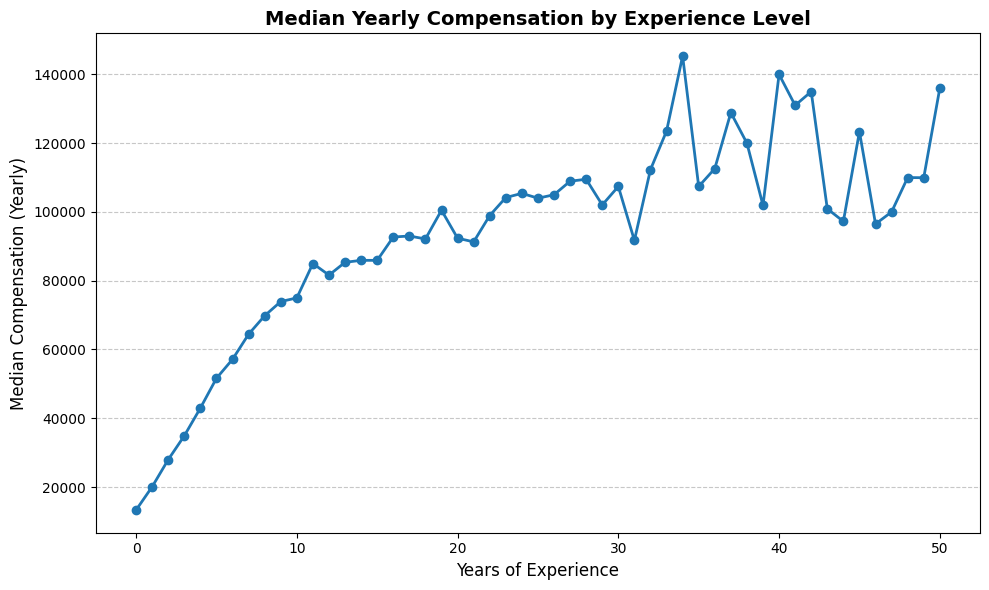

In [25]:
# Drop rows with missing values
df_exp = df.dropna(subset=['WorkExp', 'ConvertedCompYearly']).copy()

# Convert WorkExp to numeric if needed
df_exp['WorkExp'] = pd.to_numeric(df_exp['WorkExp'], errors='coerce')

# Drop rows where conversion failed
df_exp = df_exp.dropna(subset=['WorkExp'])

# Calculate median compensation by experience
median_comp_by_exp = df_exp.groupby('WorkExp', as_index=False)['ConvertedCompYearly'].median()

# Plot
plt.figure(figsize=(10,6))
plt.plot(
    median_comp_by_exp['WorkExp'],
    median_comp_by_exp['ConvertedCompYearly'],
    marker='o',
    linestyle='-',
    color='#1f77b4',
    linewidth=2
)

plt.title("Median Yearly Compensation by Experience Level", fontsize=14, weight='bold')
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Median Compensation (Yearly)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


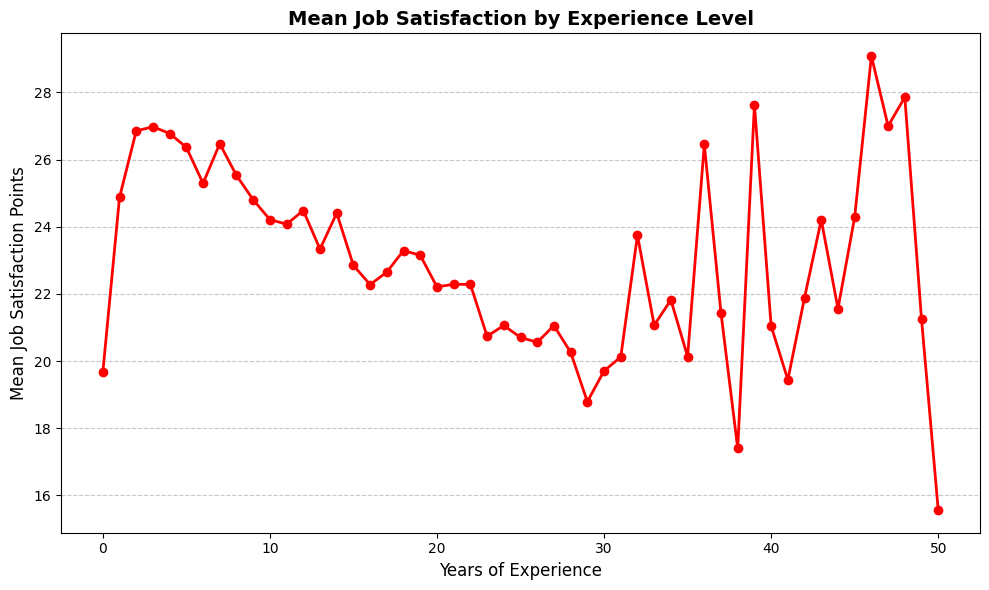

In [26]:
# Drop rows with missing values
df_exp = df.dropna(subset=['WorkExp', 'JobSatPoints_6']).copy()

# Convert WorkExp to numeric
df_exp['WorkExp'] = pd.to_numeric(df_exp['WorkExp'], errors='coerce')
df_exp = df_exp.dropna(subset=['WorkExp'])

# Calculate mean job satisfaction by experience
mean_jobsat_by_exp = df_exp.groupby('WorkExp', as_index=False)['JobSatPoints_6'].mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(
    mean_jobsat_by_exp['WorkExp'],
    mean_jobsat_by_exp['JobSatPoints_6'],
    marker='o',
    linestyle='-',
    color='red',
    linewidth=2
)

plt.title("Mean Job Satisfaction by Experience Level", fontsize=14, weight='bold')
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Mean Job Satisfaction Points", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, I explored essential data visualization techniques with a focus on analyzing trends using line charts. I practiced:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, I gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
